In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA
from random import random

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,10

In [33]:
inputCSV = '../datasets/prepared/parking-prepared.csv';
data = pd.read_csv(inputCSV)

data['spots_available'] = pd.to_numeric(data['spots_available'])
data['verification_datetime'] = pd.to_datetime(data['verification_datetime'])
data = data.set_index('verification_datetime').asfreq('15min')

data.index = pd.DatetimeIndex(data.index, freq=data.index.inferred_freq)
data = data.dropna()

predict_days = 90
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)

yhat = model_fit.predict(start=len(data), end=len(data)+predict_days*96)

print("Predict Parking Spots Available for Next 90 Days:")
print(yhat)

print("\nMin Value:",yhat.min())
print("Max Value:",yhat.max())

print("\nDone!")

C:\Users\lrmen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Predict Parking Spots Available for Next 90 Days:
16219     979.320748
16220    1120.621393
16221    1265.758926
16222    1413.636987
16223    1563.209553
            ...     
24855    3209.793727
24856    3209.793727
24857    3209.793727
24858    3209.793727
24859    3209.793727
Length: 8641, dtype: float64

Min Value: 979.3207482051266
Max Value: 4016.937727425895

Done!


C:\Users\lrmen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [34]:
predict = pd.date_range(start='2017-04-22', end='2017-07-21', freq="15min")

final = pd.DataFrame(data=predict, columns=['verification_datetime'])
final['spots_available'] = yhat.tolist()

final['0'] = pd.to_datetime(final['verification_datetime'])
final = final.set_index('verification_datetime').asfreq('15min')
final.index = pd.DatetimeIndex(final.index, freq=final.index.inferred_freq)

final = final.drop(final.columns[1], axis=1)

print("Done.")

Done.


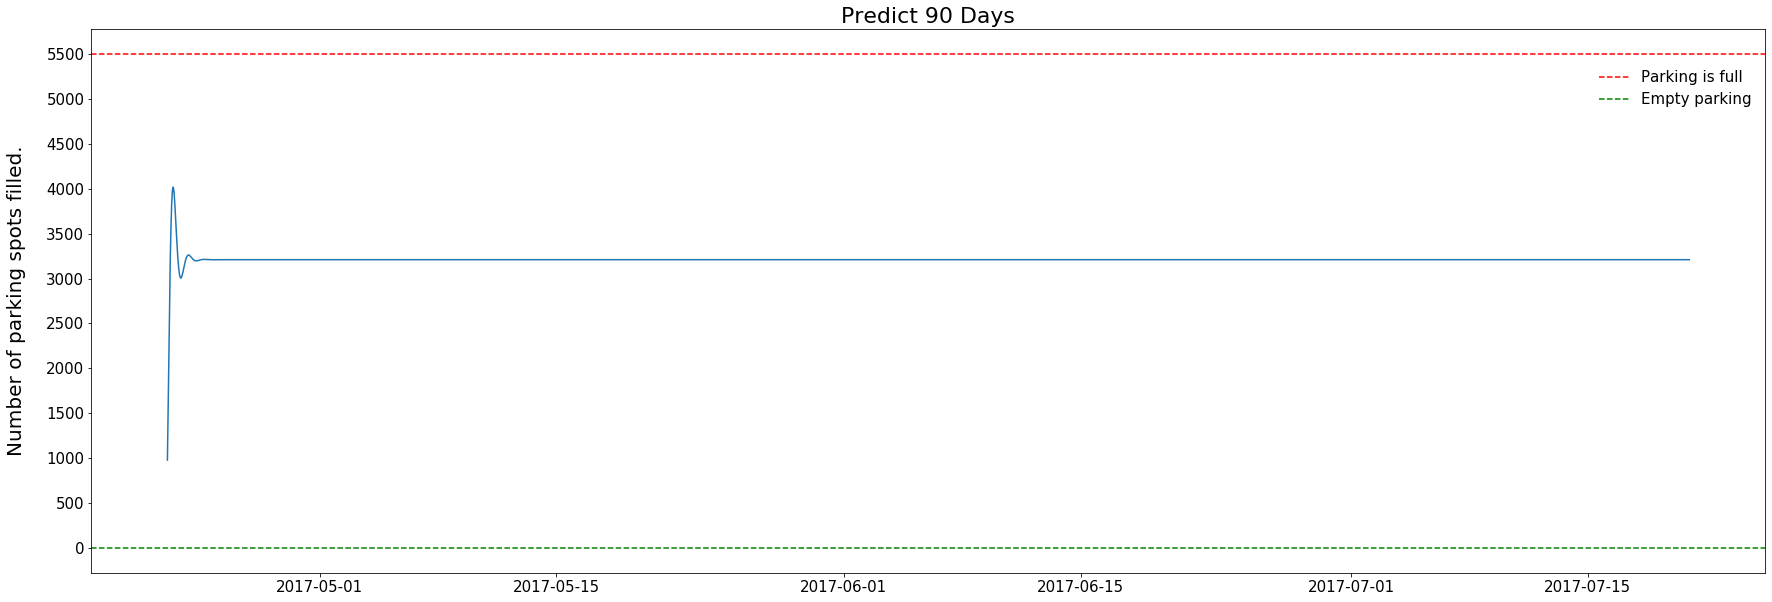

In [35]:
# Filter the dataset from the range of time with the minimun noise
prepared_data = final.copy()

#prepared_data = prepared_data[(prepared_data.index.to_series().dt.day >= 3) | (prepared_data.index.to_series().dt.month != 6)]

plt.tick_params(axis='both', which='major',  labelsize=15)
plt.ylabel('Number of parking spots filled.', labelpad=20,  fontsize=20)

#plt.plot(y=5500, color='r', linestyle='dashed')

plt.plot(prepared_data)
plt.title("Predict 90 Days", fontSize=22)
plt.locator_params(axis='y', nbins=21)
plt.axhline(y=5500, color='r', linestyle='--', label="Parking is full")
plt.axhline(y=0, color='g', linestyle='--', label="Empty parking")
plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1, 0.95), prop={'size': 15})